In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def weekday_word(weekday):
    if weekday==0:
        return "Monday"
    elif weekday==1:
        return "Tuesday"
    elif weekday==2:
        return "Wednesday"
    elif weekday==3:
        return "Thursday"
    elif weekday==4:
        return "Friday"
    elif weekday==5:
        return "Saturday"
    else:
        return "Sunday"
    
def is_weekend(weekday):
    return weekday in [5,6]

In [5]:
f=pd.read_csv(r"C:\Users\Bruger\OneDrive - Danmarks Tekniske Universitet\Dokumenter\00- Introduction to Business Analytics\Project\Trips_2018.csv")

In [6]:
f.describe()

,Unnamed: 0,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender
count,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,8.774169e+06,9.887432e+02,1.589282e+03,4.073737e+01,-7.398260e+01,1.580830e+03,4.073704e+01,-7.398281e+01,2.656141e+04,1.978993e+03,1.148613e+00
std,5.065769e+06,1.889584e+04,1.439432e+03,3.225813e-02,1.912753e-02,1.438502e+03,3.206583e-02,1.919611e-02,6.222916e+03,1.192922e+01,5.438043e-01
min,0.000000e+00,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.387084e+06,3.580000e+02,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,1.969000e+03,1.000000e+00
50%,8.774169e+06,6.050000e+02,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,1.981000e+03,1.000000e+00
75%,1.316125e+07,1.060000e+03,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,1.989000e+03,1.000000e+00
max,1.754834e+07,1.951005e+07,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00


In [7]:

f['starttime'] = pd.to_datetime(f['starttime'], format='%Y-%m-%d %H:%M:%S.%f')
f['stoptime'] = pd.to_datetime(f['stoptime'], format='%Y-%m-%d %H:%M:%S.%f')
f['weekday']= f['starttime'].dt.weekday
f['is_weekend']=[is_weekend(el) for el in f['weekday']]
sm_dummies=pd.get_dummies(f, columns=['usertype'])

In [8]:
f.dtypes

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
weekday                             int64
is_weekend                           bool
dtype: object

In [9]:
sm_dummies.dtypes

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
birth_year                          int64
gender                              int64
weekday                             int64
is_weekend                           bool
usertype_Customer                   uint8
usertype_Subscriber                 uint8
dtype: object

# Clustering

In [10]:
new_df = f.drop_duplicates(subset='start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
new_df = new_df.set_index("start_station_id")

In [11]:
x=new_df[['start_station_longitude', 'start_station_latitude']]
len(x)

819

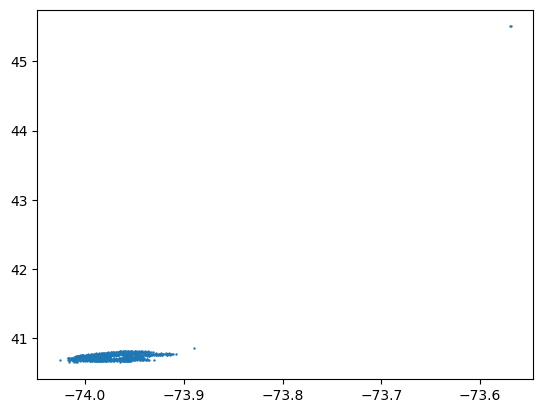

In [12]:
plt.scatter(x['start_station_longitude'],x['start_station_latitude'],s=0.5)

## DBScan

In [13]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(min_samples=30, eps=0.009) 
dbs.fit(x)

DBSCAN(eps=0.009, min_samples=30)

In [14]:
dbs.labels_

array([-1,  0,  0,  1,  1, -1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  1,  0,  0,  0,  1,  1,
       -1,  1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  1,
        0,  0,  0,  0,  0, -1,  1, -1,  0,  1,  0,  0,  0, -1,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,
       -1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  1,  1,  1,  0,  0,
       -1,  1,  1, -1,  0,  0,  0,  0,  0,  1,  1,  0, -1,  0,  0,  0, -1,
        0,  1,  0, -1, -1,  1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,
       -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0, -1,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1

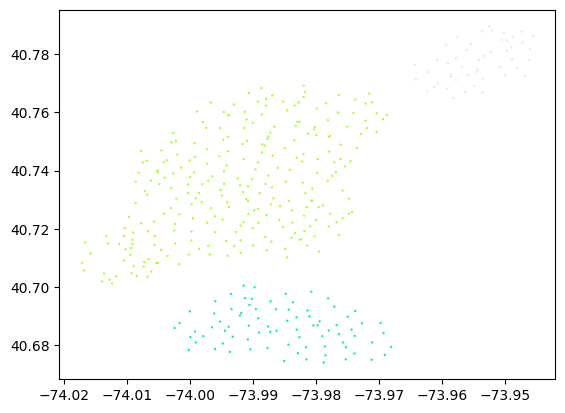

In [15]:
import random
from matplotlib import colors as mcolors

num_colors=len(set(dbs.labels_))-1   #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors=random.choices(colors, k=num_colors)
x_=[]
y_=[]
c_=[]
for label, x_val, y_val in zip(dbs.labels_, x['start_station_longitude'], x['start_station_latitude']):
    if label==-1:
        continue
    x_.append(x_val)
    y_.append(y_val)
    c_.append(cluster_colors[label])
#plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=0.5,c=c_)
plt.show()

## K-means

In [ ]:
from sklearn.cluster import KMeans
K=20
k=KMeans(K,random_state=42)


In [17]:
k.fit(new_df)

KMeans(n_clusters=20)

In [18]:
dt_clusters=new_df.copy()
dt_clusters['cluster']=k.fit_predict(new_df)

In [19]:
dt_clusters

,start_station_latitude,start_station_longitude,cluster
start_station_id,,,
72.0,40.767272,-73.993929,19
79.0,40.719116,-74.006667,15
82.0,40.711174,-74.000165,6
83.0,40.683826,-73.976323,2
119.0,40.696089,-73.978034,2
...,...,...,...
3716.0,40.753599,-73.937956,13
3718.0,40.727464,-73.979504,17
3719.0,40.683223,-73.973812,2


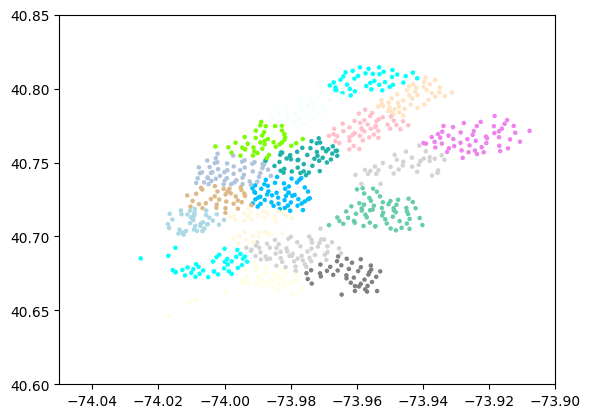

In [20]:
num_colors=K  #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors = random.choices(colors,k=K)  

x_points=dt_clusters["start_station_longitude"]
y_points=dt_clusters["start_station_latitude"]
# Get labels and cluster centers
labels = dt_clusters["cluster"]
x_=[]
y_=[]
c_=[]
for label, x, y in zip(labels, x_points, y_points):
    if label==-1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])
#plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=5,c=c_)
plt.xlim(-74.05,-73.9)
plt.ylim(40.6,40.85)
plt.show()

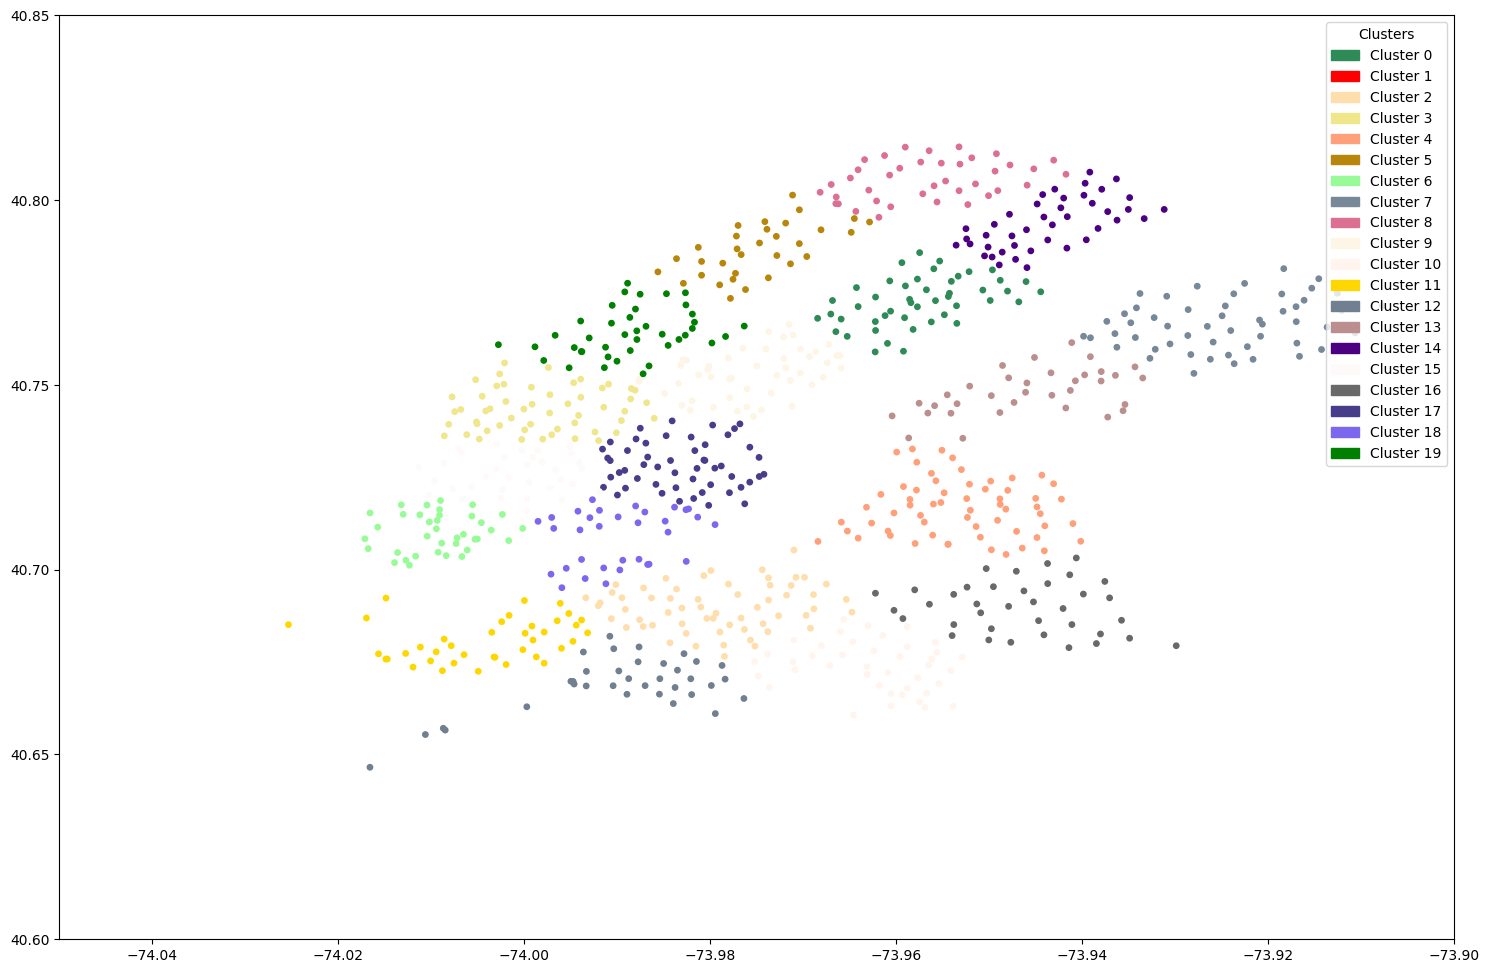

In [21]:
import matplotlib.patches as mpatches
import random

num_colors = K  # number of clusters excluding -1
colors = list(mcolors.CSS4_COLORS.keys())
cluster_colors = random.choices(colors, k=num_colors)

x_points = dt_clusters["start_station_longitude"]
y_points = dt_clusters["start_station_latitude"]
labels = dt_clusters["cluster"]

x_ = []
y_ = []
c_ = []

for label, x, y in zip(labels, x_points, y_points):
    if label == -1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])

plt.figure(figsize=(18, 12))
plt.scatter(x_, y_, s=15, c=c_)

# Set axis limits
plt.xlim(-74.05, -73.9)
plt.ylim(40.6, 40.85)

# Create legend patches
legend_patches = [
    mpatches.Patch(color=cluster_colors[i], label=f'Cluster {i}')
    for i in range(num_colors)
]
plt.legend(handles=legend_patches, title="Clusters", loc="upper right")

plt.show()


# Connect clusters with the 17 mio data frame

In [22]:
df_merged = f.merge(
    dt_clusters[['cluster']], 
    left_on='start_station_id', 
    right_index=True, 
    how='left'
)
df_merged = df_merged.drop(columns=['Unnamed: 0'])


In [23]:
df_merged[df_merged["cluster"]==12]

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster
560672,79,2018-01-11 10:12:58.979,2018-01-11 10:14:18.703,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12
560673,185,2018-01-11 10:15:48.486,2018-01-11 10:18:54.284,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12
560674,136,2018-01-11 10:21:20.566,2018-01-11 10:23:37.389,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12
560675,129,2018-01-11 10:24:03.587,2018-01-11 10:26:13.073,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12
560676,275,2018-01-11 10:26:55.663,2018-01-11 10:31:30.869,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548052,567,2018-12-31 20:46:49.874,2018-12-31 20:56:16.957,3373.0,40.675070,-73.987752,3306.0,40.666208,-73.981999,21677,Subscriber,1988,1,0,False,12
17548100,2119,2018-12-31 21:13:05.732,2018-12-31 21:48:25.147,3404.0,40.670492,-73.985417,3368.0,40.672816,-73.983524,27541,Subscriber,1970,1,0,False,12
17548126,158,2018-12-31 21:28:09.056,2018-12-31 21:30:47.355,3423.0,40.661063,-73.979453,3300.0,40.665147,-73.976376,17113,Subscriber,1979,2,0,False,12
17548159,1592,2018-12-31 21:50:45.543,2018-12-31 22:17:18.434,3368.0,40.672816,-73.983524,3232.0,40.689622,-73.983043,35725,Subscriber,1970,1,0,False,12


# Investigating a cluster

In [24]:
cluster_12 = df_merged[df_merged["cluster"]==12]

In [25]:
cluster_12 = cluster_12.copy()
cluster_12.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster
560672,79,2018-01-11 10:12:58.979,2018-01-11 10:14:18.703,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12
560673,185,2018-01-11 10:15:48.486,2018-01-11 10:18:54.284,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12
560674,136,2018-01-11 10:21:20.566,2018-01-11 10:23:37.389,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12
560675,129,2018-01-11 10:24:03.587,2018-01-11 10:26:13.073,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12
560676,275,2018-01-11 10:26:55.663,2018-01-11 10:31:30.869,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12


# Data visualization for a cluster

In [26]:


# Make sure starttime is a datetime
cluster_12['starttime'] = pd.to_datetime(cluster_12['starttime'])

# Extract date and hour
cluster_12['date'] = cluster_12['starttime'].dt.date
cluster_12['hour'] = cluster_12['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour = cluster_12.groupby(['date', 'hour']).size().reset_index(name='num_trips')
trips_per_hour


,date,hour,num_trips
0,2018-01-01,1,6
1,2018-01-01,4,2
2,2018-01-01,6,3
3,2018-01-01,7,2
4,2018-01-01,8,4
...,...,...,...
8107,2018-12-31,18,6
8108,2018-12-31,19,2
8109,2018-12-31,20,5
8110,2018-12-31,21,3


In [27]:

trips_per_hour['datetime'] = pd.to_datetime(trips_per_hour['date'].astype(str)) + pd.to_timedelta(trips_per_hour['hour'], unit='h')
trips_per_hour.set_index('datetime', inplace=True)
trips_per_hour.drop(columns=['date'], inplace=True)
trips_per_hour.head()



,hour,num_trips
datetime,,
2018-01-01 01:00:00,1,6
2018-01-01 04:00:00,4,2
2018-01-01 06:00:00,6,3
2018-01-01 07:00:00,7,2
2018-01-01 08:00:00,8,4


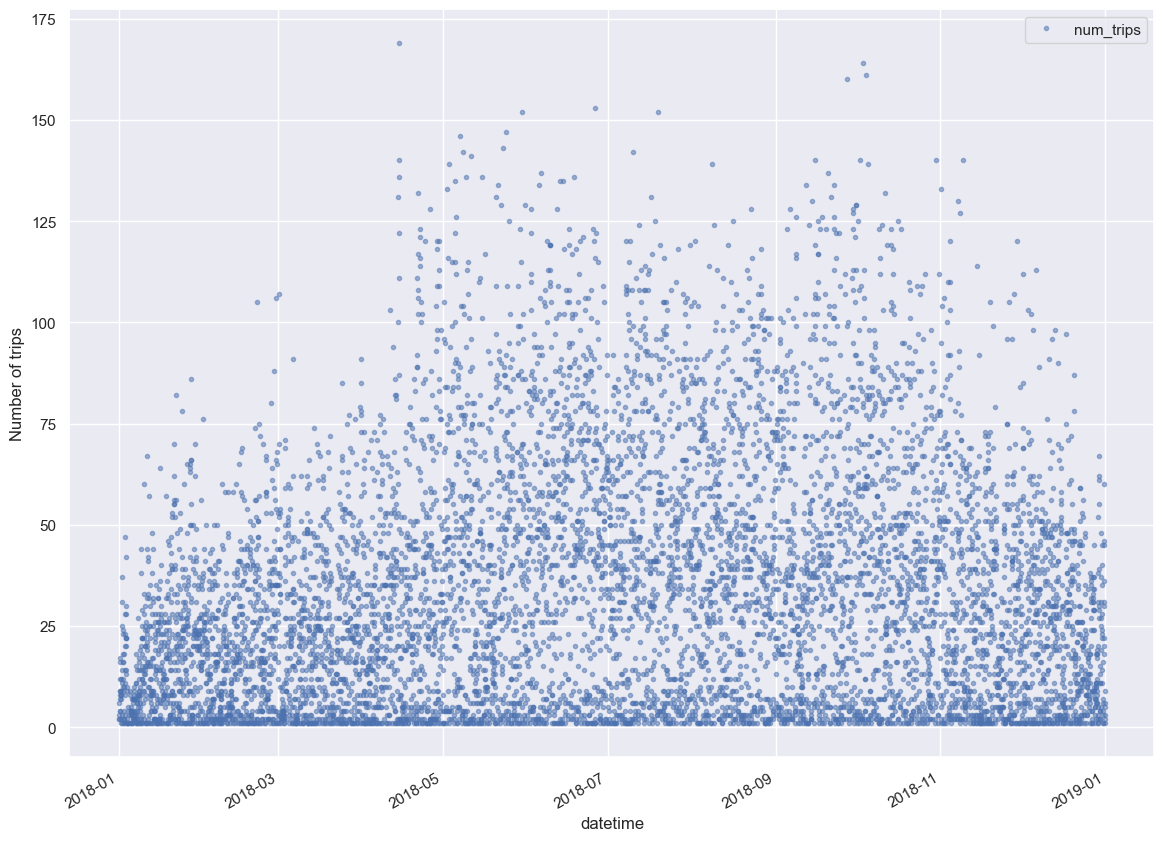

In [28]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 5)})
cols_plot = ['num_trips']
axes = trips_per_hour[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 11), subplots=True)
for ax in axes:
    ax.set_ylabel('Number of trips')

Text(0, 0.5, 'number of trips')

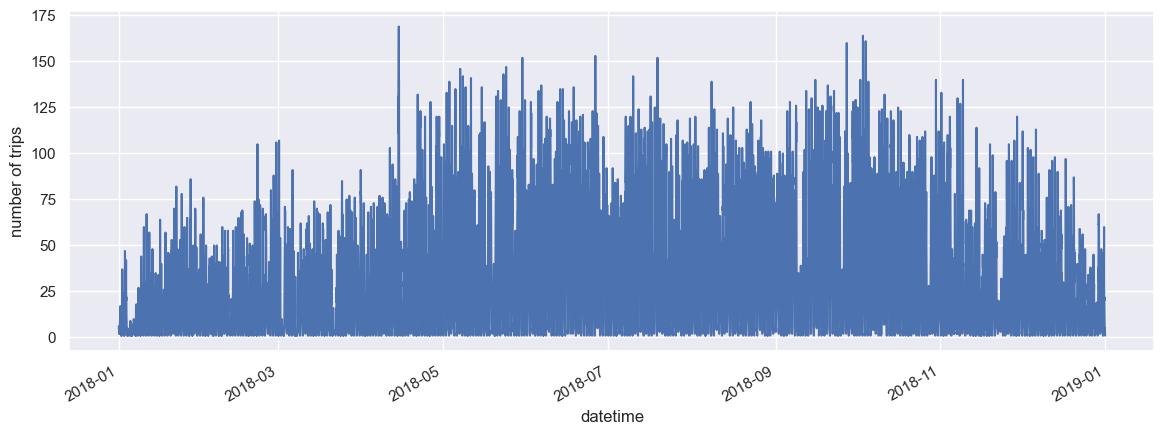

In [29]:
ax = trips_per_hour.loc['2018', 'num_trips'].plot()
ax.set_ylabel('number of trips')

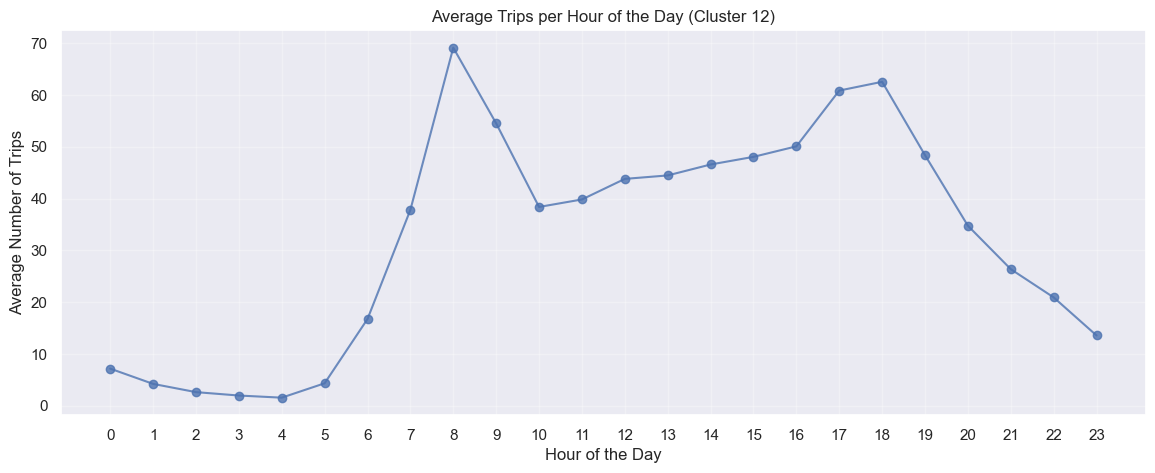

In [30]:
# Average trips per hour (0-23) across all days
avg_trips_by_hour = trips_per_hour.groupby('hour')['num_trips'].mean()
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 5)})

# Plot average trips by hour
avg_trips_by_hour.plot(marker='o', linestyle='-', alpha=0.8)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour of the Day (Cluster 12)')
plt.xticks(range(0,24))  # ensure all hours are labeled
plt.grid(True, alpha=0.3)
plt.show()


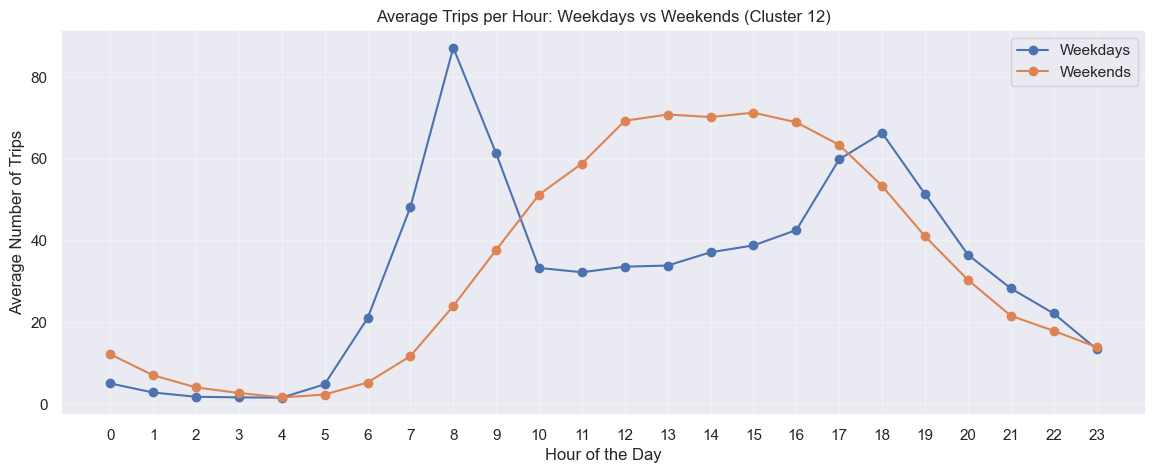

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract hour from datetime index if not already present
trips_per_hour['hour'] = trips_per_hour.index.hour
trips_per_hour['is_weekend'] = trips_per_hour.index.weekday >= 5

# Average trips per hour for weekdays
avg_weekday = trips_per_hour[~trips_per_hour['is_weekend']].groupby('hour')['num_trips'].mean()

# Average trips per hour for weekends
avg_weekend = trips_per_hour[trips_per_hour['is_weekend']].groupby('hour')['num_trips'].mean()

# Plot
sns.set(rc={'figure.figsize':(14,5)})
plt.plot(avg_weekday.index, avg_weekday.values, marker='o', linestyle='-', label='Weekdays')
plt.plot(avg_weekend.index, avg_weekend.values, marker='o', linestyle='-', label='Weekends')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour: Weekdays vs Weekends (Cluster 12)')
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.legend()
plt.show()


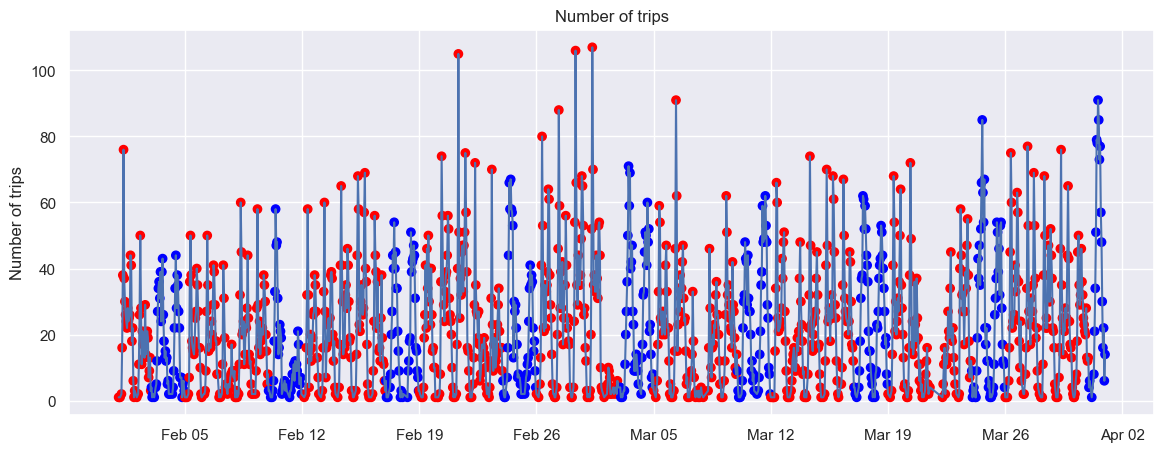

In [32]:
import matplotlib.dates as mdates
weekends=trips_per_hour.loc['2018-02':'2018-03', 'num_trips'].index.weekday>=5
colors=['blue' if x else 'red' for x in weekends]
fig, ax = plt.subplots()
ax.plot(trips_per_hour.loc['2018-02':'2018-03', 'num_trips'])
ax.scatter(trips_per_hour.loc['2018-02':'2018-03'].index, trips_per_hour.loc['2018-02':'2018-03', 'num_trips'], marker='o', linestyle='-', c=colors)
ax.set_ylabel('Number of trips')
ax.set_title('Number of trips')

# To better visualize the weekly seasonality in electricity consumption 
# we add vertical gridlines on a weekly time scale

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

# Investigating all the data

In [33]:


# Make sure starttime is a datetime
df_merged['starttime'] = pd.to_datetime(df_merged['starttime'])

# Extract date and hour
df_merged['date'] = df_merged['starttime'].dt.date
df_merged['hour'] = df_merged['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour_all = df_merged.groupby(['date', 'hour']).size().reset_index(name='num_trips')

trips_per_hour_all['datetime'] = pd.to_datetime(trips_per_hour_all['date'].astype(str)) + pd.to_timedelta(trips_per_hour_all['hour'], unit='h')
trips_per_hour_all.set_index('datetime', inplace=True)
trips_per_hour_all.drop(columns=['date'], inplace=True)

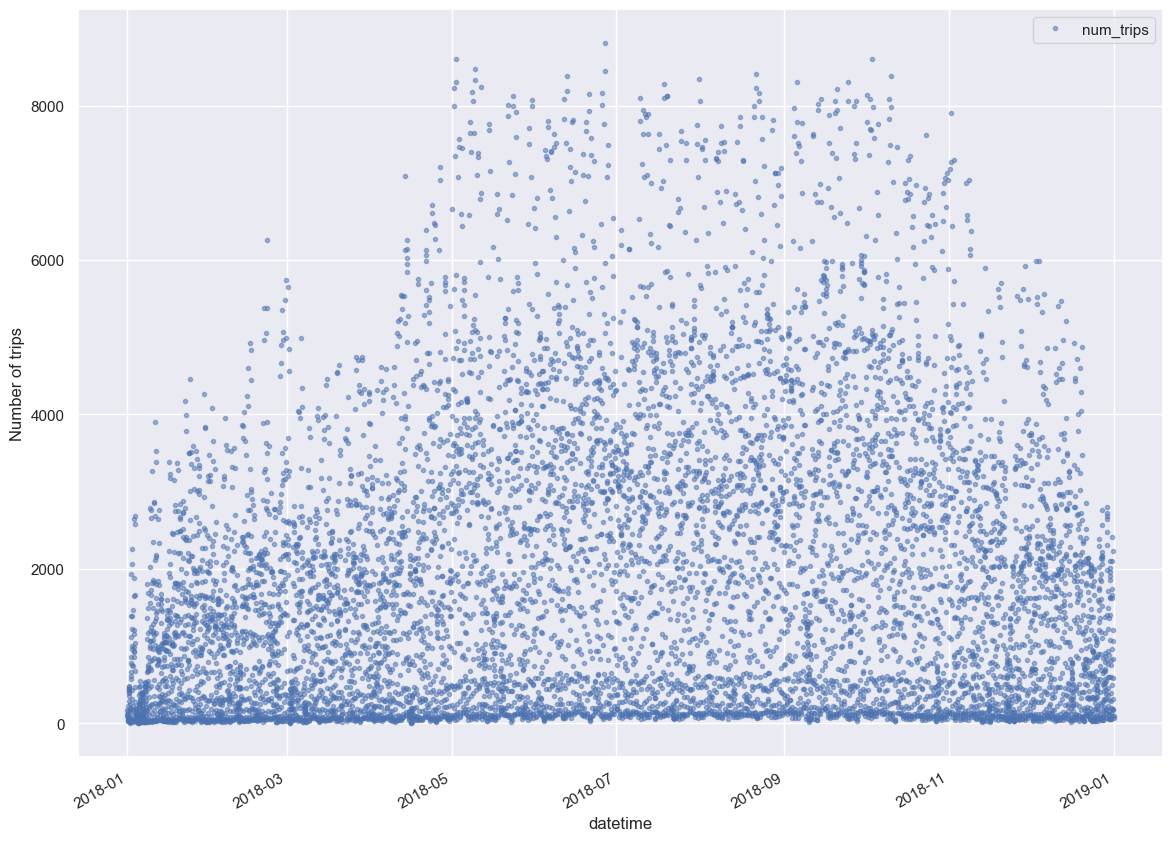

In [34]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 5)})
cols_plot = ['num_trips']
axes = trips_per_hour_all[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 11), subplots=True)
for ax in axes:
    ax.set_ylabel('Number of trips')

Text(0, 0.5, 'number of trips')

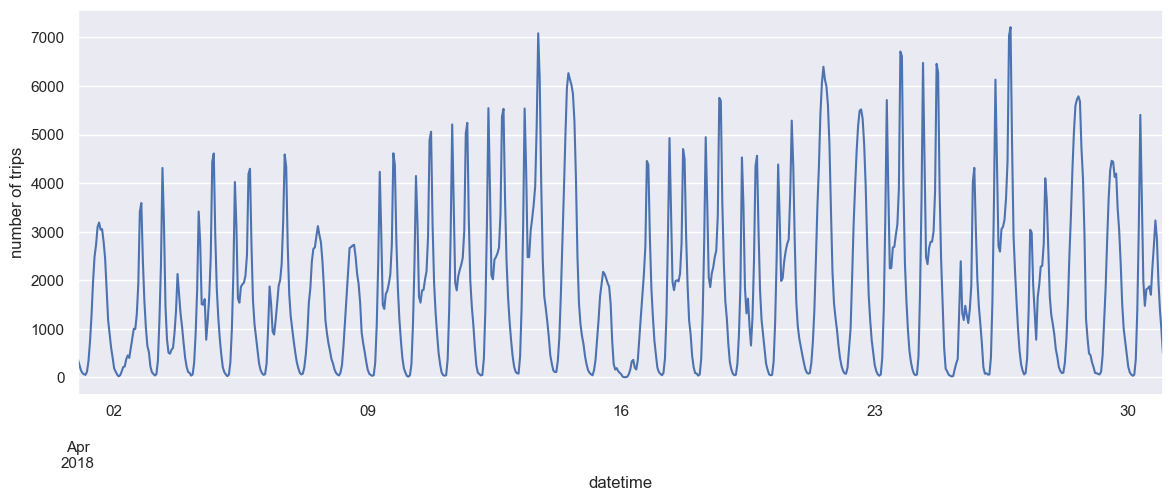

In [35]:
ax = trips_per_hour_all.loc['2018-04', 'num_trips'].plot()
ax.set_ylabel('number of trips')

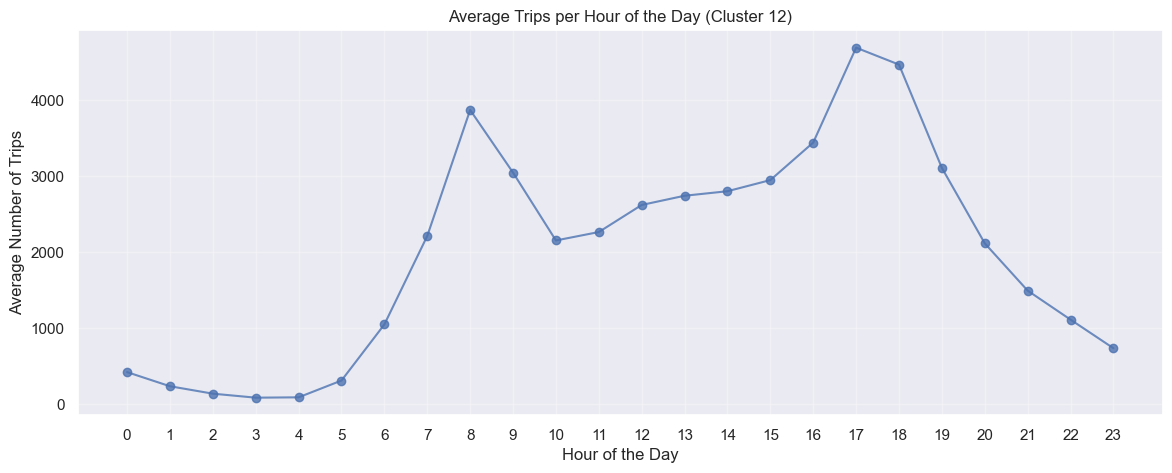

In [36]:
# Average trips per hour (0-23) across all days
avg_trips_by_hour_all = trips_per_hour_all.groupby('hour')['num_trips'].mean()
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 5)})

# Plot average trips by hour
avg_trips_by_hour_all.plot(marker='o', linestyle='-', alpha=0.8)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour of the Day (Cluster 12)')
plt.xticks(range(0,24))  # ensure all hours are labeled
plt.grid(True, alpha=0.3)
plt.show()

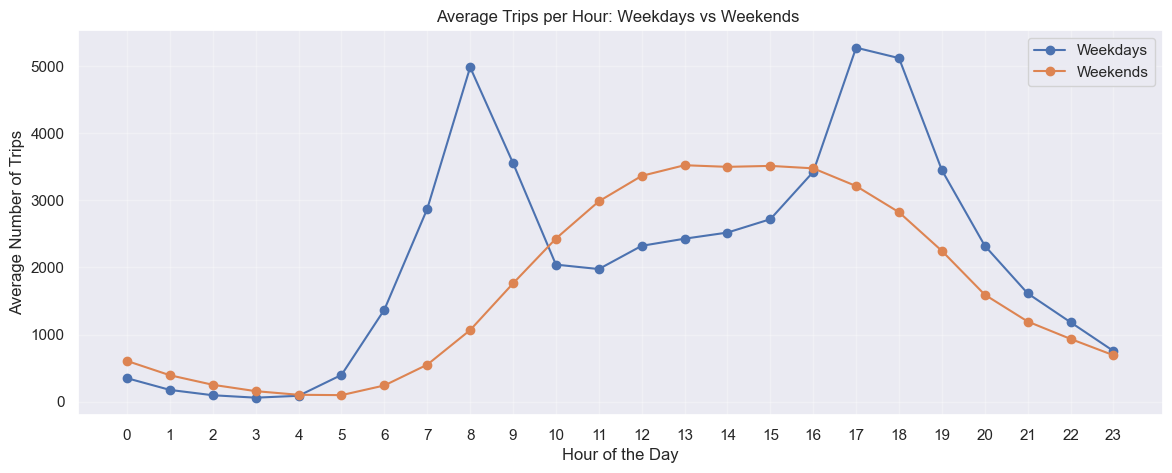

In [37]:

# Extract hour from datetime index if not already present
trips_per_hour_all['hour'] = trips_per_hour_all.index.hour
trips_per_hour_all['is_weekend'] = trips_per_hour_all.index.weekday >= 5

# Average trips per hour for weekdays
avg_weekday = trips_per_hour_all[~trips_per_hour_all['is_weekend']].groupby('hour')['num_trips'].mean()

# Average trips per hour for weekends
avg_weekend = trips_per_hour_all[trips_per_hour_all['is_weekend']].groupby('hour')['num_trips'].mean()

# Plot
sns.set(rc={'figure.figsize':(14,5)})
plt.plot(avg_weekday.index, avg_weekday.values, marker='o', linestyle='-', label='Weekdays')
plt.plot(avg_weekend.index, avg_weekend.values, marker='o', linestyle='-', label='Weekends')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour: Weekdays vs Weekends ')
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.legend()
plt.show()

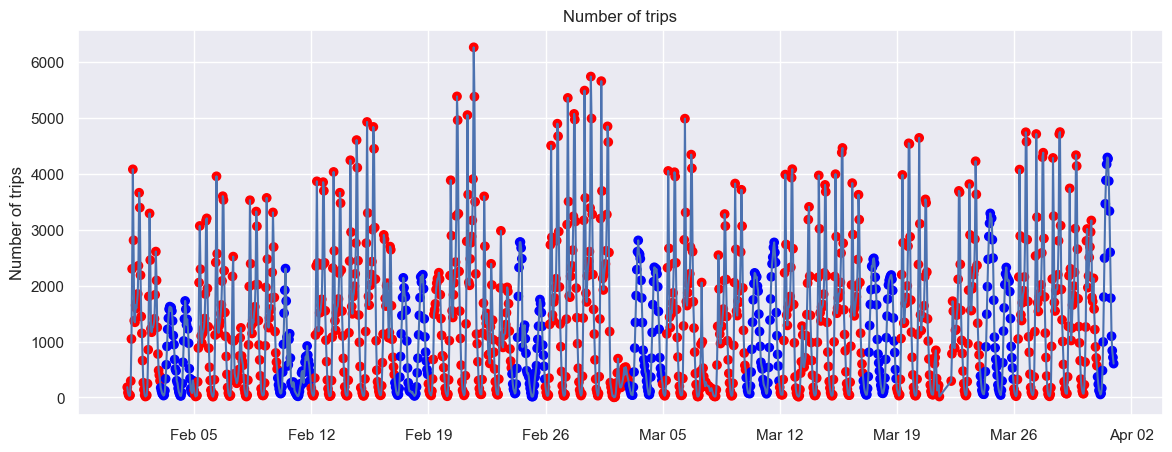

In [38]:
weekends=trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'].index.weekday>=5
colors=['blue' if x else 'red' for x in weekends]
fig, ax = plt.subplots()
ax.plot(trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'])
ax.scatter(trips_per_hour_all.loc['2018-02':'2018-03'].index, trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'], marker='o', linestyle='-', c=colors)
ax.set_ylabel('Number of trips')
ax.set_title('Number of trips')

# To better visualize the weekly seasonality in electricity consumption 
# we add vertical gridlines on a weekly time scale

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [39]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(trips_per_hour_all['num_trips'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.133164
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


# Exploring seasonality in all the data

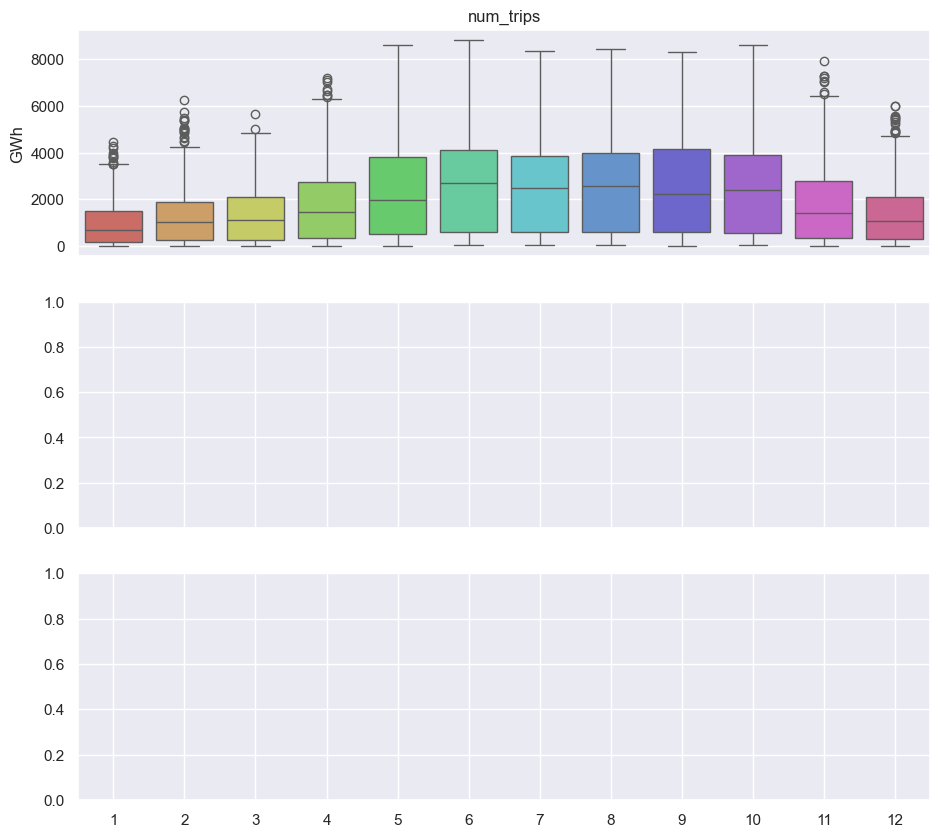

In [40]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
trips_per_hour_all['Month'] = trips_per_hour_all.index.month
for name, ax in zip(['num_trips'], axes):
    sns.boxplot(data=trips_per_hour_all, x='Month', y=name, ax=ax, hue='Month',palette=sns.color_palette("hls", 12),legend=False)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

<AxesSubplot:xlabel='hour', ylabel='num_trips'>

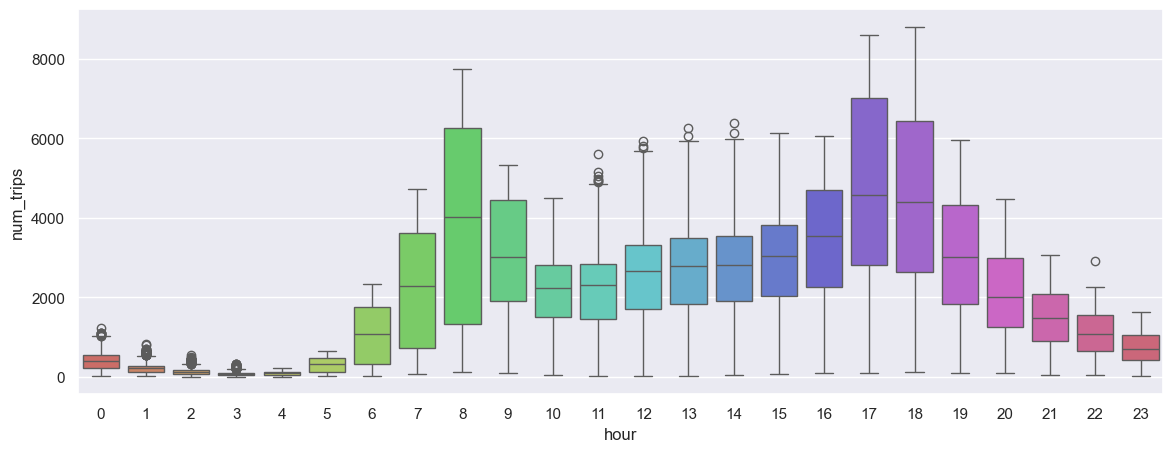

In [41]:
sns.boxplot(data=trips_per_hour_all, x='hour', y='num_trips',hue='hour',palette=sns.color_palette("hls", 24),legend=False)

# Rolling average

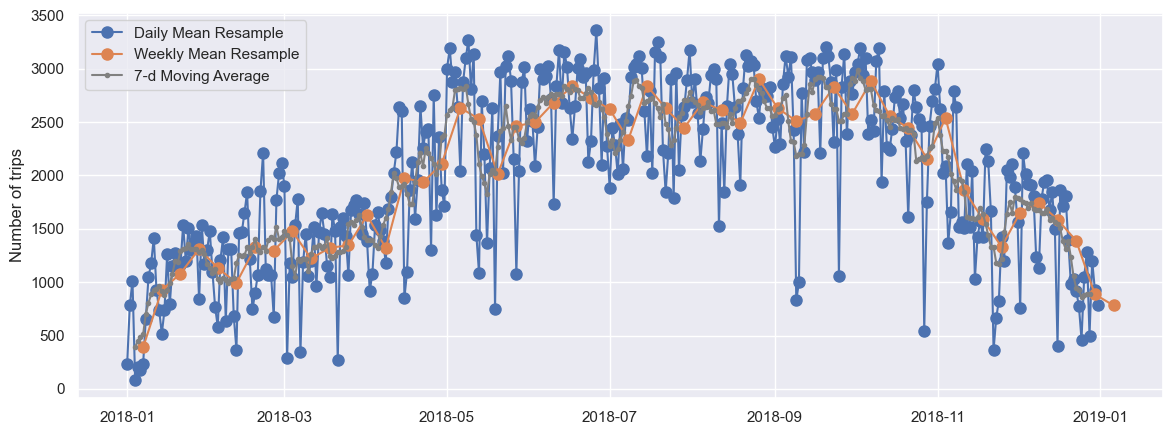

In [42]:
data_columns = ['num_trips']
opsd_daily_mean = trips_per_hour_all[data_columns].resample('D').mean()
opsd_daily_mean[:3]
opsd_weekly_mean = trips_per_hour_all[data_columns].resample('W').mean()
opsd_weekly_mean[:3]

opsd_7d = opsd_daily_mean[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

start, end = '2018-01', '2019-01'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily_mean.loc[start:end, 'num_trips'],
marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.plot(opsd_weekly_mean.loc[start:end, 'num_trips'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'num_trips'],
marker='.', linestyle='-', label='7-d Moving Average', color="grey")
ax.set_ylabel('Number of trips')
ax.legend()

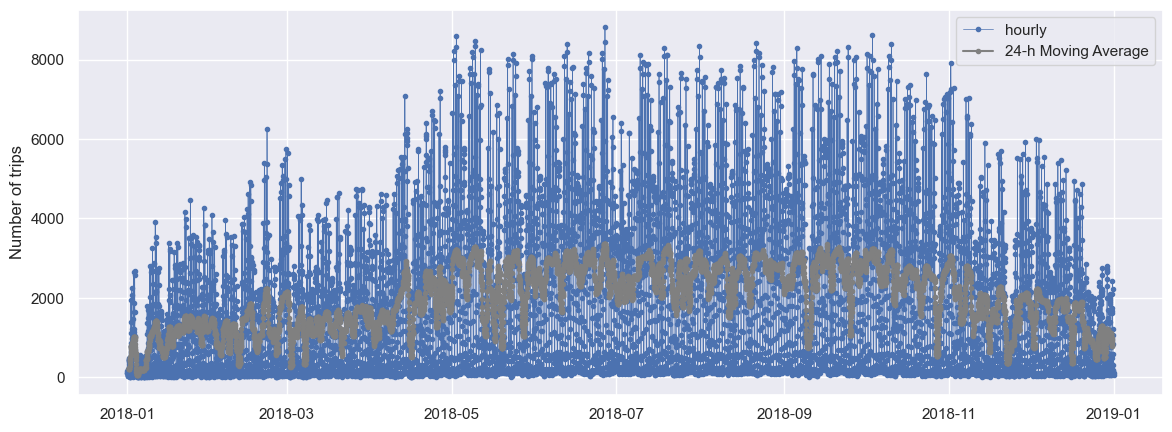

In [43]:

opsd_24h = trips_per_hour_all[data_columns].rolling(24, center=True).mean()
start, end = '2018-01', '2019-01'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(trips_per_hour_all.loc[start:end, 'num_trips'],
marker='.', linestyle='-', linewidth=0.5, label='hourly')
ax.plot(opsd_24h.loc[start:end, 'num_trips'],
marker='.', linestyle='-', label='24-h Moving Average', color="grey")
ax.set_ylabel('Number of trips')
ax.legend()

# Autocorrelation

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

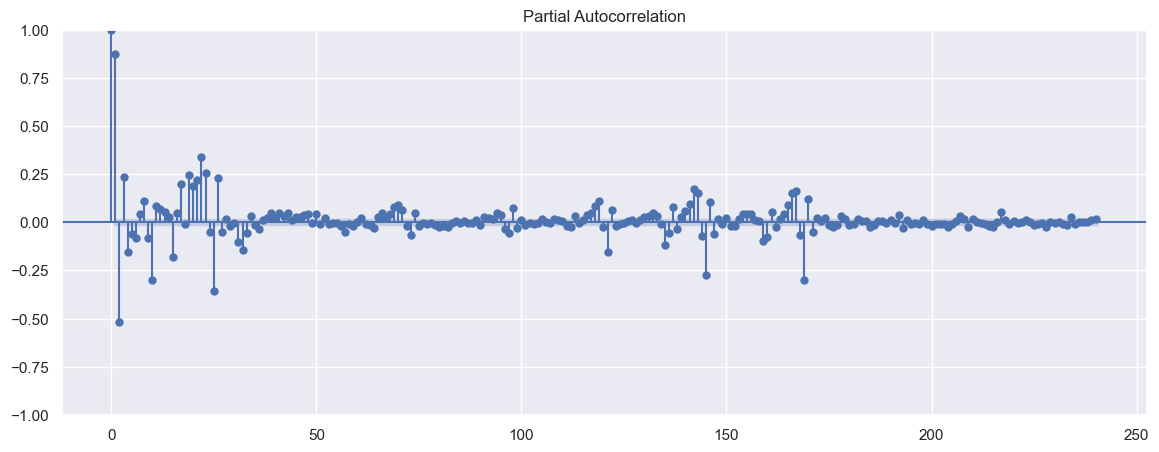

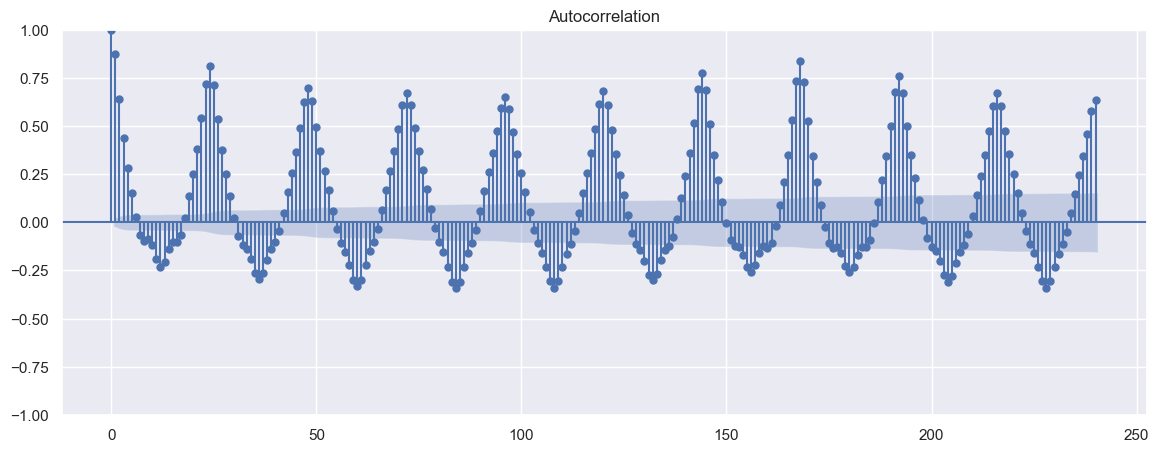

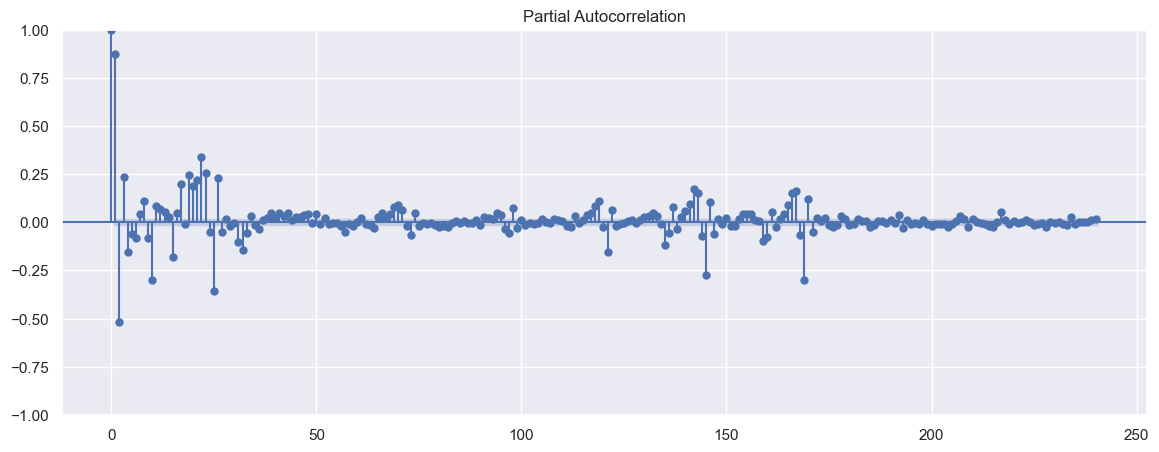

In [45]:
plot_acf(trips_per_hour_all['num_trips'],lags=10*24) # lags valgt udfra 10 dage gnage 24 timer
plot_pacf(trips_per_hour_all['num_trips'],lags=10*24)

# Further investigation of what variables to keep for our prediction model

We discussed: leaving out starttime, stoptime, and longitude and latitude for both end station and startstation. The spatial because we now just care which cluster we are in, therefore also leave out the stations ID. Starttime is relevant stop time not su much because we try to predict demand. ANd the trip duration will be kept, also weekend, birth year, most common usertype, and most common gender. Bike ID have also been left out as it seems irrelevant to know which bike goes where at this point. 

In [46]:


# Make sure starttime is a datetime
cluster_12['starttime'] = pd.to_datetime(cluster_12['starttime'])

# Extract date and hour
cluster_12['date'] = cluster_12['starttime'].dt.date
cluster_12['hour'] = cluster_12['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour = cluster_12.groupby(['date', 'hour'])
trips_per_hour.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster,date,hour
560672,79,2018-01-11 10:12:58.979,2018-01-11 10:14:18.703,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12,2018-01-11,10
560673,185,2018-01-11 10:15:48.486,2018-01-11 10:18:54.284,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12,2018-01-11,10
560674,136,2018-01-11 10:21:20.566,2018-01-11 10:23:37.389,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12,2018-01-11,10
560675,129,2018-01-11 10:24:03.587,2018-01-11 10:26:13.073,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12,2018-01-11,10
560676,275,2018-01-11 10:26:55.663,2018-01-11 10:31:30.869,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12,2018-01-11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548052,567,2018-12-31 20:46:49.874,2018-12-31 20:56:16.957,3373.0,40.675070,-73.987752,3306.0,40.666208,-73.981999,21677,Subscriber,1988,1,0,False,12,2018-12-31,20
17548100,2119,2018-12-31 21:13:05.732,2018-12-31 21:48:25.147,3404.0,40.670492,-73.985417,3368.0,40.672816,-73.983524,27541,Subscriber,1970,1,0,False,12,2018-12-31,21
17548126,158,2018-12-31 21:28:09.056,2018-12-31 21:30:47.355,3423.0,40.661063,-73.979453,3300.0,40.665147,-73.976376,17113,Subscriber,1979,2,0,False,12,2018-12-31,21
17548159,1592,2018-12-31 21:50:45.543,2018-12-31 22:17:18.434,3368.0,40.672816,-73.983524,3232.0,40.689622,-73.983043,35725,Subscriber,1970,1,0,False,12,2018-12-31,21


In [47]:

cluster_12.index.name = 'trip_id'
cluster_12

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster,date,hour
trip_id,,,,,,,,,,,,,,,,,,
560672,79,2018-01-11 10:12:58.979,2018-01-11 10:14:18.703,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12,2018-01-11,10
560673,185,2018-01-11 10:15:48.486,2018-01-11 10:18:54.284,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12,2018-01-11,10
560674,136,2018-01-11 10:21:20.566,2018-01-11 10:23:37.389,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12,2018-01-11,10
560675,129,2018-01-11 10:24:03.587,2018-01-11 10:26:13.073,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12,2018-01-11,10
560676,275,2018-01-11 10:26:55.663,2018-01-11 10:31:30.869,3239.0,40.646538,-74.016588,3239.0,40.646538,-74.016588,22368,Subscriber,1993,1,3,False,12,2018-01-11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548052,567,2018-12-31 20:46:49.874,2018-12-31 20:56:16.957,3373.0,40.675070,-73.987752,3306.0,40.666208,-73.981999,21677,Subscriber,1988,1,0,False,12,2018-12-31,20
17548100,2119,2018-12-31 21:13:05.732,2018-12-31 21:48:25.147,3404.0,40.670492,-73.985417,3368.0,40.672816,-73.983524,27541,Subscriber,1970,1,0,False,12,2018-12-31,21
17548126,158,2018-12-31 21:28:09.056,2018-12-31 21:30:47.355,3423.0,40.661063,-73.979453,3300.0,40.665147,-73.976376,17113,Subscriber,1979,2,0,False,12,2018-12-31,21


In [48]:

grouped = (
    cluster_12.groupby(['date', 'hour'])
      .agg(
          trip_count=('tripduration', 'count'),
          is_weekend=('is_weekend', 'first'),
          most_common_user_type=('usertype', lambda x: x.value_counts().index[0]),
          most_common_gender=('gender', lambda x: x.value_counts().index[0]),
          duration_mean=('tripduration', 'mean'),
          birth_mean=('birth_year', 'mean')
      )
      .reset_index()
)


In [49]:
grouped['datetime'] = pd.to_datetime(grouped['date'].astype(str)) + pd.to_timedelta(grouped['hour'], unit='h')
grouped.set_index('datetime', inplace=True)
grouped.drop(columns=['date'], inplace=True)
grouped.drop(columns=['hour'], inplace=True)



In [50]:
grouped

,trip_count,is_weekend,most_common_user_type,most_common_gender,duration_mean,birth_mean
datetime,,,,,,
2018-01-01 01:00:00,6,False,Subscriber,1,400.166667,1977.333333
2018-01-01 04:00:00,2,False,Subscriber,1,522.000000,1972.500000
2018-01-01 06:00:00,3,False,Subscriber,1,233.666667,1975.666667
2018-01-01 07:00:00,2,False,Subscriber,1,324.000000,1973.000000
2018-01-01 08:00:00,4,False,Subscriber,1,911.000000,1981.250000
...,...,...,...,...,...,...
2018-12-31 18:00:00,6,False,Subscriber,1,682.333333,1982.000000
2018-12-31 19:00:00,2,False,Subscriber,2,357.500000,1986.000000
2018-12-31 20:00:00,5,False,Subscriber,1,403.000000,1988.400000


# Starting to build model

## non stationarity - hjælp
Vi kan jo se nogle klare seasonalities - how to account for them

In [51]:
result = adfuller(trips_per_hour_all['num_trips'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.133164
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


## Naive model - predict same val for trip_count as 24 h before

In [52]:
# Make sure the index is a DatetimeIndex
grouped.index = pd.to_datetime(grouped.index)

# Define the test start date
test_start = pd.Timestamp("2018-11-01")

# Create boolean masks
train_mask = grouped.index < test_start
test_mask  = grouped.index >= test_start


In [53]:
def plain_moving_average(series, n):
    #write your code here
    return list([np.average(series.iloc[max(i-n,0):i-1]) for i in range(1,len(series)+1)])

def plotprediction(series, pred_series, labels=["original", "predicted"], x_axis=None, plot_intervals=False, scale=1.96, plot_anomalies=False, title="prediction"):

    plt.figure(figsize=(15,5))
    plt.title(title)
    if x_axis is None:
        x_axis=series.index
    
    plt.plot(x_axis, pred_series, "g", label=labels[1])
    plt.plot(x_axis, series, label=labels[0])
    

    # Plot confidence intervals for smoothed values

    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

In [54]:
grouped['copy_pred'] = [0]*24 + grouped['trip_count'].to_list()[:-24]

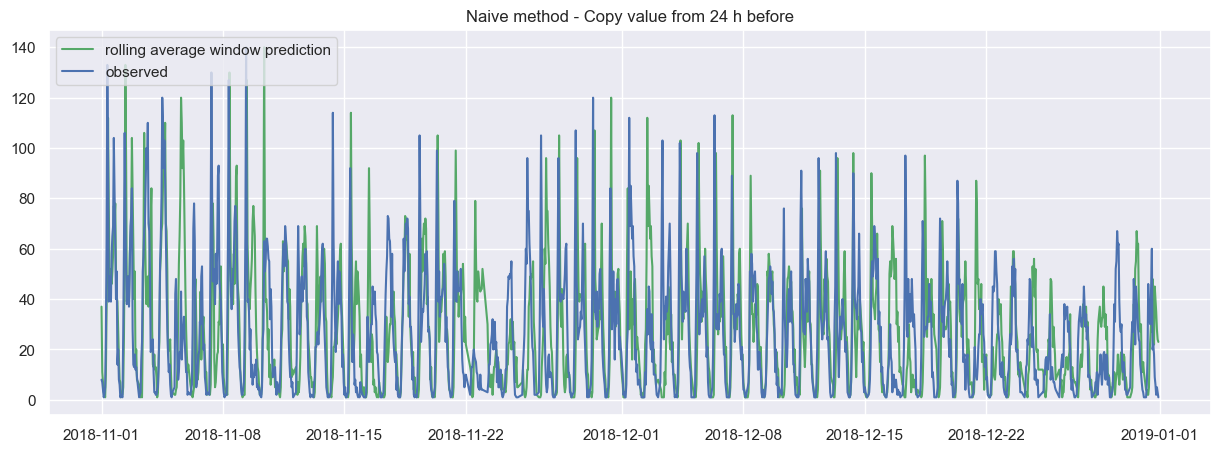

In [55]:
plotprediction(grouped[test_mask]['trip_count'], grouped[test_mask]['copy_pred'], labels=['observed', 'rolling average window prediction'], title="Naive method - Copy value from 24 h before")

### Eval. of Naive model

In [56]:
from sklearn.metrics import r2_score, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_stats(y_test, y_preds, title="You forgot the title!"):
    print(title+": ")
    print("\tr^2=%f"%r2_score(y_test,y_preds))
    print("\tMAE=%f"%mean_absolute_error(y_test,y_preds))
    print("\tMAPE=%f"%mean_absolute_percentage_error(y_test,y_preds))

In [57]:
print_stats(grouped[test_mask]['trip_count'], grouped[test_mask]['copy_pred'], "copy method")

copy method: 
	r^2=-0.119707
	MAE=17.714180
	MAPE=139.680468


# Trying to do an ARIMA model
### Be aware that for this ARIMA model we only use trip_count as variable to predict - not weekend or any of the others

So QUESTIONS:
Can we get categorical (or event just more data) in the arima model?
How to choose parameters for p,q and d? 

Det kan være at ARIMA med tuning kan blive godt, men Lineær Regression kan muligvis opnå lignende resultater med mindre besvær. -(Konklusion fra kaggle-linket)

In [58]:
from statsmodels.tsa.arima.model import ARIMA

In [59]:
grouped_data = pd.DataFrame(grouped.trip_count.copy())
grouped_data


,trip_count
datetime,
2018-01-01 01:00:00,6
2018-01-01 04:00:00,2
2018-01-01 06:00:00,3
2018-01-01 07:00:00,2
2018-01-01 08:00:00,4
...,...
2018-12-31 18:00:00,6
2018-12-31 19:00:00,2
2018-12-31 20:00:00,5


In [60]:
data=grouped_data[train_mask]
model=ARIMA(data, order=(24, 0, 0))
AR=model.fit()
print(AR.summary())

c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             trip_count   No. Observations:                 6765
Model:                ARIMA(24, 0, 0)   Log Likelihood              -27938.414
Date:                Mon, 24 Nov 2025   AIC                          55928.829
Time:                        11:16:10   BIC                          56106.136
Sample:                             0   HQIC                         55990.031
                               - 6765                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.9926      2.649     13.589      0.000      30.801      41.184
ar.L1          0.8712      0.009     95.777      0.000       0.853       0.889
ar.L2         -0.1843      0.014    -13.215      0.0

Kan man få Sarima til at tage højde for is_weekend? 
When testing the model - we can update one day at a time? So after we predicted for a day we add the actual values for that day and then try to predict the next one?

# ARIMA 2.0

In [61]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

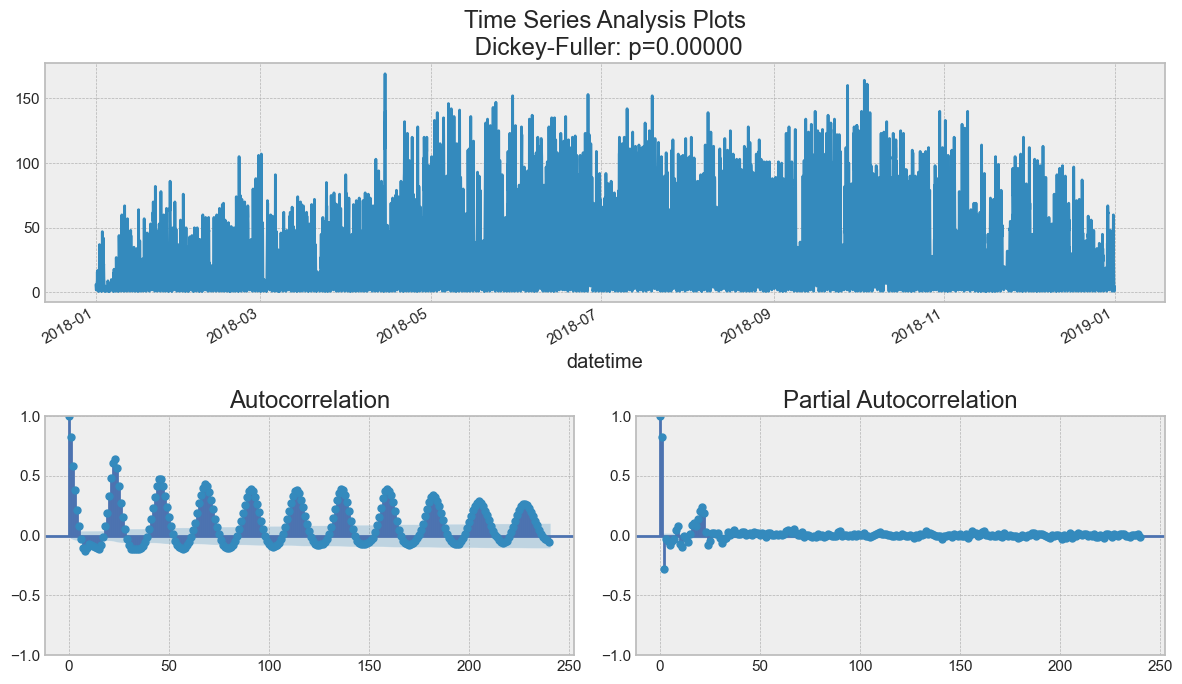

In [62]:
tsplot(grouped_data.trip_count, lags=10*24)

# Adjusting for daily seasonality: 

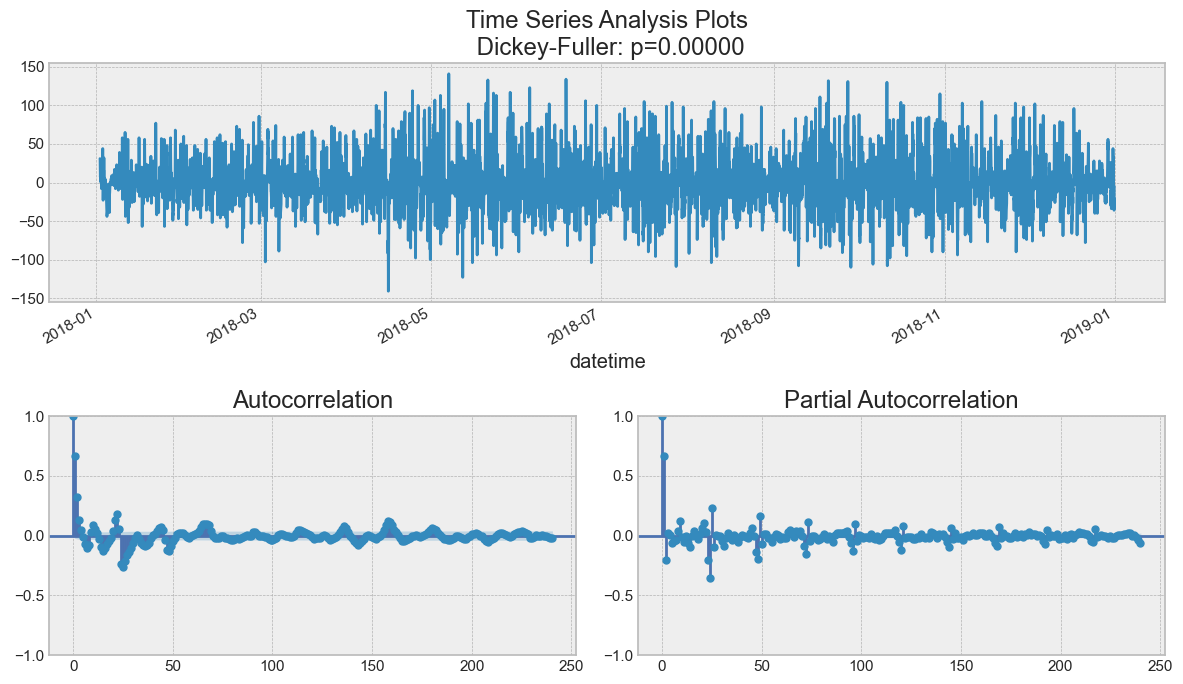

In [63]:
trip_diff = grouped_data.trip_count - grouped_data.trip_count.shift(24)
tsplot(trip_diff[24:], lags=10*24)

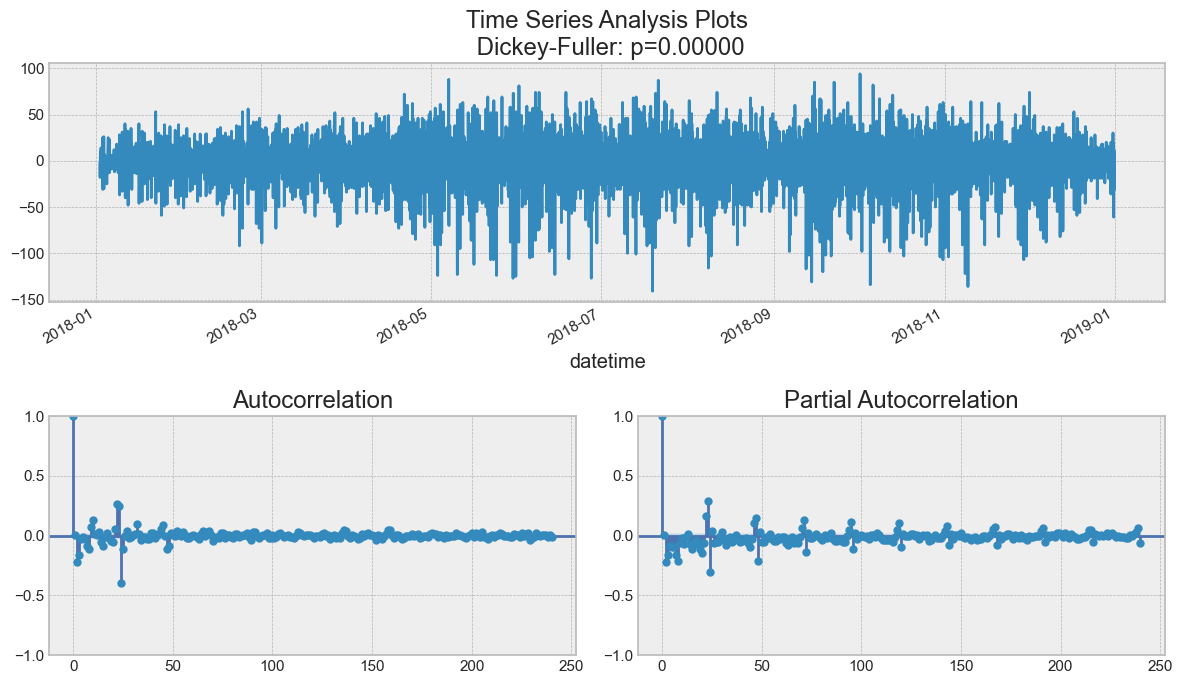

In [64]:
trip_diff = trip_diff - trip_diff.shift(1)
tsplot(trip_diff[24+1:], lags=10*24)

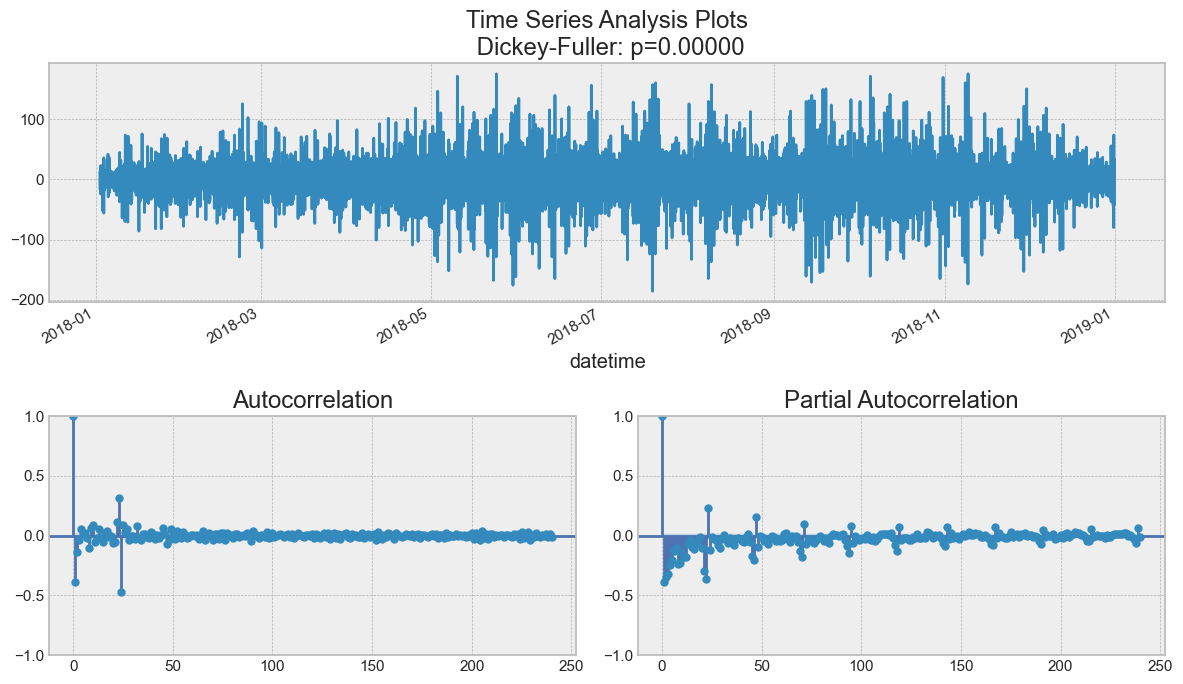

In [65]:
trip_diff = trip_diff - trip_diff.shift(1)
trip_clean = trip_diff[25:].replace([np.inf, -np.inf], np.nan).dropna()
tsplot(trip_clean, lags=10*24)

In [66]:
from itertools import product
ps = range(1, 6)
d=0 
qs = range(1, 6)
Ps = range(1, 7)
D=0 
Qs = range(1, 7)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

900

In [67]:
from tqdm import tqdm_notebook
'''
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table
    ''' # Kode from Kaggle - does not use 

'\ndef optimizeSARIMA(parameters_list, d, D, s):\n    """\n        Return dataframe with parameters and corresponding AIC\n        \n        parameters_list - list with (p, q, P, Q) tuples\n        d - integration order in ARIMA model\n        D - seasonal integration order \n        s - length of season\n    """\n    \n    results = []\n    best_aic = float("inf")\n\n    for param in tqdm_notebook(parameters_list):\n        # we need try-except because on some combinations model fails to converge\n        try:\n            model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(param[0], d, param[1]), \n                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)\n        except:\n            continue\n        aic = model.aic\n        # saving best model, AIC and parameters\n        if aic < best_aic:\n            best_model = model\n            best_aic = aic\n            best_param = param\n        results.append([param, model.aic])\n\n    result_table

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd

# --- simple split ---
val_start = pd.Timestamp("2018-10-01")
test_start = pd.Timestamp("2018-11-01")

# Create boolean masks
train_mask = grouped.index < test_start
test_mask  = grouped.index >= test_start
val_mask = (grouped.index <= test_start)&(grouped.index>val_start)
train = grouped_data[train_mask]
val = grouped_data[val_mask]
test = grouped_data[test_mask]


results = []

for param in parameters_list:
    try:
        model = SARIMAX(
            train,
            order=(param[0], d, param[1]),
            seasonal_order=(param[2], D, param[3], s)
        ).fit(disp=False)
    except:
        continue

    # --- Training MSE ---
    train_pred = model.fittedvalues
    train_mse = np.mean((train - train_pred) ** 2)

    # --- Validation MSE ---
    val_forecast = model.forecast(steps=len(val))
    val_mse = np.mean((val - val_forecast) ** 2)

    results.append([param, train_mse, val_mse])

# --- Put results in a table ---
result_table = pd.DataFrame(results, columns=["parameters", "train_mse", "val_mse"])

# Sort by validation performance (lower is better)
result_table = result_table.sort_values(by='val_mse').reset_index(drop=True)

result_table


c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bruger\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa

# Missing - after completing the grid search we need to compute the score on the test set. 